# Instructor Do: Speeding up ML algorithms with PCA

In [52]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [53]:
# Loading the preprocessed iris dataset
file_path = Path("/Users/bigd/Downloads/new_iris_data.csv")
df_iris = pd.read_csv(file_path)
df_iris.head()

,sativa_1,indicia_1,sativa_2,hybird_2
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


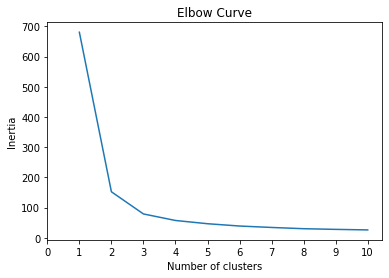

In [54]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris)
    inertia.append(km.inertia_)


# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [55]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris)

# Predict clusters
predictions = model.predict(df_iris)

# Add the predicted class column to the dataframe
df_iris["class"] = model.labels_
df_iris.head()

,sativa_1,indicia_1,sativa_2,hybird_2,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


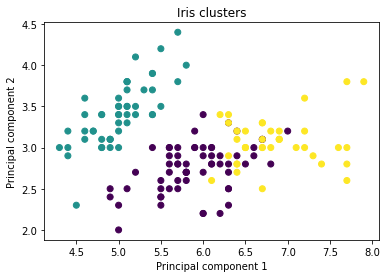

In [59]:
# Visualize the clusters
plt.scatter(x = df_iris['sativa_1'], y=df_iris['indicia_1'], c = df_iris['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Iris clusters')
plt.show()